/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2832: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


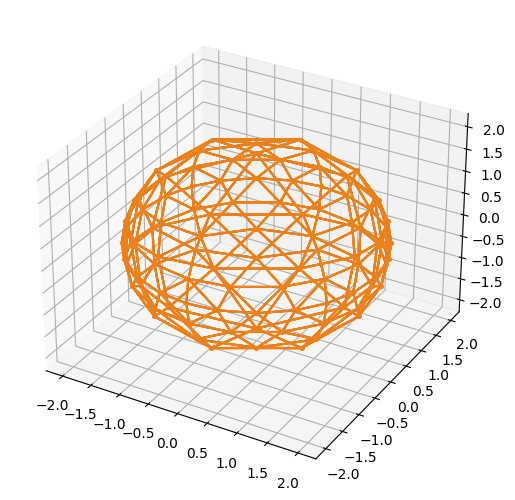

In [33]:
# Imports and physical parameters
import numpy as np
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import *
from matplotlib.widgets import Slider
from lsm import HNdC_ijk

# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ddgclib._complex import Complex
from ddgclib import *
from ddgclib._complex import *
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._capillary_rise_flow import * #plot_surface#, curvature
from ddgclib._hyperboloid import *
from ddgclib._catenoid import *
from ddgclib._ellipsoid import *
from ddgclib._eos import *
from ddgclib._misc import *
from ddgclib._plotting import *
from ddgclib._sphere import *
#from ddgclib._case2 import *

# Numerical parameters #Stated this is what to pla
N = 7  # Determines mesh incidence
refinement = 2

r = 2  # analytical area = 2 pi r**2, so take 2 pi
HC = sphere_from_cap(r, N=N, refinement=refinement)


if 1:
    HC.plot_complex()
    plt.show()

# Plot conforimation
if 0:
    ps = plot_polyscope(HC, vector_field=None, scalar_field=None, fn='', up="x_up"
                        , stl=False)
    ps.show()

/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2832: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


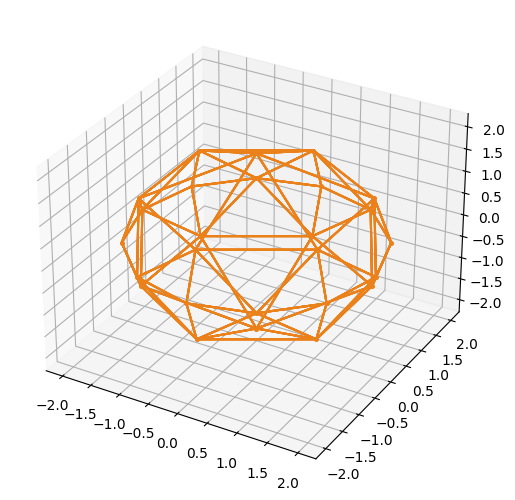

In [72]:
refinement = 1

r = 2  # analytical area = 2 pi r**2, so take 2 pi
HC = sphere_from_cap(r, N=N, refinement=refinement)


if 1:
    HC.plot_complex()
    plt.show()


/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2832: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


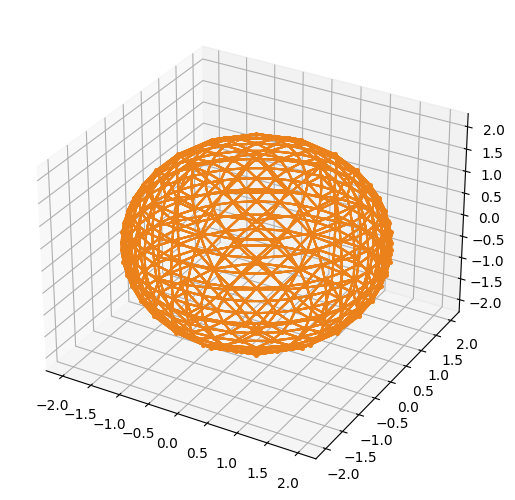

In [73]:
refinement = 3

r = 2  # analytical area = 2 pi r**2, so take 2 pi
HC = sphere_from_cap(r, N=N, refinement=refinement)


if 1:
    HC.plot_complex()
    plt.show()


In [34]:
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']), N_f0, c_outd['HNdA_i']

(-1.9999999999999997273,
 array([0.95079854, 0.18298126, 0.25      ], dtype=float128),
 array([-0.17424667, -0.03336562, -0.0521759 ], dtype=float128))

In [50]:
# Compute the curvature
HNdA_i = []  # total HNdA_i at vertex i
A_ijk = []  # total HNdA_i for edge ij
C_ij = []
alpha_ij = []
NdA_i = []

for v in HC.V:
    #print(f'v.index = {v.index}')
    N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
    N_f0 = normalized(N_f0)[0]
    F, nn = vectorise_vnn(v)
    # Compute discrete curvatures
    c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
    # Append lists
    c_outd['HNdA_ij']
    HNdA_i.append(c_outd['HNdA_i'])
    C_ij.append(c_outd['C_ij'])
    alpha_ij.append(c_outd['alpha_ij'])
    A_ijk.append(c_outd['A_ijk'])
    #print(f'N_f0 dot = {N_f0}')
    np.dot(N_f0, c_outd['HNdA_i'])
    NdA_i.append(c_outd['NdA_i'])
    
   # print(f"np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = {np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij'])}")

# [0]
# HNdA_i = 0.5 * np.sum(HNdA_ij, axis=0)
# HN_i = np.sum(HNdA_i) / np.sum(C_ij)
#HNdA_ij, HN_i, HNdA_i, C_ij, alpha_ij
print(f'np.sum(HNdA_i, axis=0) = {np.sum(HNdA_i, axis=0)}')
#print(f'HNdA_i[0] = {HNdA_i[0]}')
#print(f'nn = {nn}')
#print(f'F= {F}')
NdA_i = np.array(NdA_i)
print(f'NdA_i = {NdA_i}')



np.sum(HNdA_i, axis=0) = [7.31836466e-19 3.38813179e-19 1.11130723e-18]
NdA_i = [[ 9.03501810e-21  0.00000000e+00 -1.51554446e+00]
 [-1.36970874e-17  1.60128154e-01  0.00000000e+00]
 [ 1.38675049e-01  8.00640769e-02  0.00000000e+00]
 [ 1.38675049e-01 -8.00640769e-02  0.00000000e+00]
 [ 1.07516715e-17 -1.60128154e-01 -9.03501810e-21]
 [-1.38675049e-01 -8.00640769e-02  0.00000000e+00]
 [-1.38675049e-01  8.00640769e-02  0.00000000e+00]
 [-3.41490632e-01 -1.97159708e-01 -2.38565800e-01]
 [-1.53443787e-01 -2.65772436e-01  0.00000000e+00]
 [-3.06887575e-01 -1.97180235e-16 -9.03501810e-21]
 [-7.78457160e-17  3.94319416e-01 -2.38565800e-01]
 [ 1.53443787e-01  2.65772436e-01  2.71050543e-20]
 [-1.53443787e-01  2.65772436e-01  0.00000000e+00]
 [ 6.23958350e-17 -3.94319416e-01 -2.38565800e-01]
 [ 1.53443787e-01 -2.65772436e-01  0.00000000e+00]
 [ 3.41490632e-01 -1.97159708e-01 -2.38565800e-01]
 [ 3.06887575e-01  5.75349953e-17  0.00000000e+00]
 [ 3.41490632e-01  1.97159708e-01 -2.38565800e-01]
 [

# First vector area notion

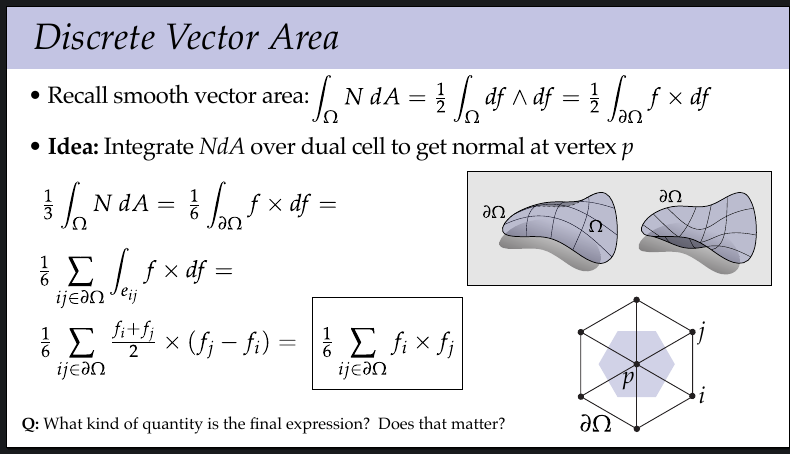

In [46]:
def HNdC_ijk(e_ij, l_ij, l_jk, l_ik):
    """
    Computes the dual edge and dual area using Heron's formula.

    :param e_ij: vector, edge e_ij
    :param l_ij: float, length of edge ij
    :param l_jk: float, length of edge jk
    :param l_ik: float, length of edge ik
    :return: hnda_ijk: vector, curvature vector
             c_ijk: float, dual areas
    """
    lengths = [l_ij, l_jk, l_ik]
    # Sort the list, python sorts from the smallest to largest element:
    lengths.sort()
    # We must have use a ≥ b ≥ c in floating-point stable Heron's formula:
    a = lengths[2]
    b = lengths[1]
    c = lengths[0]
    A = (1 / 4.0) * np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))
    # Dual weights (scalar):
    w_ij = (1 / 8.0) * (l_jk ** 2 + l_ik ** 2 - l_ij ** 2) / A   # w_ij = abs(w_ij)

    # Mean normal curvature (1x3 vector):
    hnda_ijk = w_ij * e_ij  # curvature from this edge jk in triangle ijk with w_jk = 1/2 cot(theta_i^jk)

    # Dual areas
    h_ij = 0.5 * l_ij
    b_ij = abs(w_ij) * l_ij  # = ||0.5 cot(theta_i^jk)|| * 0.5*l_ij
    c_ijk = 0.5 * b_ij * h_ij
    return hnda_ijk, c_ijk

def A_i(v, n_i=None):
    """
    Compute the discrete normal area of vertex v_i
    
    :param v: vertex object
    :return: HNdA_i: the curvature tensor at input vertex v 
             c_i:  the dual area of the vertex
    """
    # NOTE: THIS MUST BE REPLACED WITH THE LEVEL SET PLANE VECTOR:
    if n_i is not None:
        n_i = v.x

    # Initiate
    NdA_i = np.zeros(3)  # np.zeros([len(v.nn), 3])  # Mean normal curvature 
    C_i = 0.0  # np.zeros([len(v.nn), 3])  # Dual area around edge in a surface
    vi = v
    for vj in v.nn:
        # Compute the intersection set of vertices i and j:
        e_i_int_e_j = vi.nn.intersection(vj.nn)  # Set of size 1 or 2
        e_ij = vj.x_a - vi.x_a  # Compute edge ij (1x3 vector)
        e_ij = - e_ij  # WHY???
        vk = list(e_i_int_e_j)[0]  # index in triangle ijk  # NOTE: k = vk.index
        e_ik = vk.x_a - vi.x_a  # Compute edge ik (1x3 vector)
        
        #NOTE: The code below results in the INCORRECT values unless we set
        #      e_ij = - e_ij  # WHY???
        if 1:
            # Discrete vector area:
            # Simplex areas of ijk and normals
            wedge_ij_ik = np.cross(e_ij, e_ik)
            # If the wrong direction was chosen, choose the other:
          #  print(f'np.dot(normalized(wedge_ij_ik)[0], n_i) = {np.dot(normalized(wedge_ij_ik)[0], n_i)}')
            if np.dot(normalized(wedge_ij_ik)[0], n_i) < 0:
                print(f'e_ij_prev = {e_ij}')
                e_ij = vi.x_a - vj.x_a
                #e_ij = vi.x_a - vj.x_a
              #  e_ij = vj.x_a - vi.x_a  # Does not appear to be needed, 
              #                          # but more tests need to be done

        if len(e_i_int_e_j) == 1:  # boundary edge
            pass # ignore for now 

        else:  # len(e_i_int_e_j) == 2 mathematically guaranteed:
            vl = list(e_i_int_e_j)[1]  # index in triangle ijl
            # Compute dual for contact angle alpha
            e_jk = vk.x_a - vj.x_a
            # wedge_ij_ik = np.cross(e_ij, e_ik)
            # Find lengths (norm of the edge vectors):
            l_ij = np.linalg.norm(e_ij)
            l_ik = np.linalg.norm(e_ik)  # NOTE: l_ki = l_ik
            l_jk = np.linalg.norm(e_jk)
            hnda_ijk, c_ijk = HNdC_ijk(e_ij, l_ij, l_jk, l_ik)

            # Contact angle beta
            e_il = vl.x_a - vi.x_a
            e_jl = vl.x_a - vj.x_a
            l_il = np.linalg.norm(e_il)  # NOTE: l_ki = l_ik
            l_jl = np.linalg.norm(e_jl)
            hnda_ijl, c_ijl = HNdC_ijk(e_ij, l_ij, l_jl, l_il)

            # Save results
            HNdA_i += hnda_ijk
            HNdA_i += hnda_ijl
            C_i += c_ijl
            C_i += c_ijk

    return NdA_i#, C_i


#TODO: Since sparse arrays are too expensive to recreate and add to,
#      we might want cache edge lengths instead. higher dimensional
#      simplices could be done with a lexigraphic cache.
#      This is simple to parallelise on CPUs, but might be much harder
#      to do on GPUs.

def hndA_i(v, n_i=None):
    """
    Compute the mean normal curvature of vertex
    
    :param v: vertex object
    :return: HNdA_i: the curvature tensor at input vertex v 
             c_i:  the dual area of the vertex
    """
    # NOTE: THIS MUST BE REPLACED WITH THE LEVEL SET PLANE VECTOR:
    if n_i is not None:
        n_i = v.x

    # Initiate
    HNdA_i = np.zeros(3)  # np.zeros([len(v.nn), 3])  # Mean normal curvature 
    C_i = 0.0  # np.zeros([len(v.nn), 3])  # Dual area around edge in a surface
    vi = v
    for vj in v.nn:
        # Compute the intersection set of vertices i and j:
        e_i_int_e_j = vi.nn.intersection(vj.nn)  # Set of size 1 or 2
        e_ij = vj.x_a - vi.x_a  # Compute edge ij (1x3 vector)
        e_ij = - e_ij  # WHY???
        vk = list(e_i_int_e_j)[0]  # index in triangle ijk  # NOTE: k = vk.index
        e_ik = vk.x_a - vi.x_a  # Compute edge ik (1x3 vector)
        
        #NOTE: The code below results in the INCORRECT values unless we set
        #      e_ij = - e_ij  # WHY???
        if 0:
            # Discrete vector area:
            # Simplex areas of ijk and normals
            wedge_ij_ik = np.cross(e_ij, e_ik)
            # If the wrong direction was chosen, choose the other:
          #  print(f'np.dot(normalized(wedge_ij_ik)[0], n_i) = {np.dot(normalized(wedge_ij_ik)[0], n_i)}')
            if np.dot(normalized(wedge_ij_ik)[0], n_i) < 0:
                e_ij = vi.x_a - vj.x_a
                #e_ij = vi.x_a - vj.x_a
              #  e_ij = vj.x_a - vi.x_a  # Does not appear to be needed, 
              #                          # but more tests need to be done

        if len(e_i_int_e_j) == 1:  # boundary edge
            vk = list(e_i_int_e_j)[0]  # Boundary edge index
            # Compute edges in triangle ijk
            e_ik = vk.x_a - vi.x_a
            e_jk = vk.x_a - vj.x_a
            # Find lengths (norm of the edge vectors):
            l_ij = np.linalg.norm(e_ij)
            l_ik = np.linalg.norm(e_ik)  # NOTE: l_ki = l_ik
            l_jk = np.linalg.norm(e_jk)
            hnda_ijk, c_ijk = HNdC_ijk(e_ij, l_ij, l_jk, l_ik)
            
            # Save results
            HNdA_i += hnda_ijk
            C_i += c_ijk

        else:  # len(e_i_int_e_j) == 2 mathematically guaranteed:
            vl = list(e_i_int_e_j)[1]  # index in triangle ijl
            # Compute dual for contact angle alpha
            e_jk = vk.x_a - vj.x_a
            # wedge_ij_ik = np.cross(e_ij, e_ik)
            # Find lengths (norm of the edge vectors):
            l_ij = np.linalg.norm(e_ij)
            l_ik = np.linalg.norm(e_ik)  # NOTE: l_ki = l_ik
            l_jk = np.linalg.norm(e_jk)
            hnda_ijk, c_ijk = HNdC_ijk(e_ij, l_ij, l_jk, l_ik)

            # Contact angle beta
            e_il = vl.x_a - vi.x_a
            e_jl = vl.x_a - vj.x_a
            l_il = np.linalg.norm(e_il)  # NOTE: l_ki = l_ik
            l_jl = np.linalg.norm(e_jl)
            hnda_ijl, c_ijl = HNdC_ijk(e_ij, l_ij, l_jl, l_il)

            # Save results
            HNdA_i += hnda_ijk
            HNdA_i += hnda_ijl
            C_i += c_ijl
            C_i += c_ijk

    return HNdA_i, C_i

# Start main loop
HNdA_ijk_l, C_ijk_l = [], []
C = 0
HNdA = np.zeros(3)
for v in HC.V:
    n_i = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
    n_i = normalized(n_i)[0]  
    n_test = n_i + (np.random.rand(3) - 0.5)
    HNdA_i, C_i = hndA_i(v, n_i=n_test)
    C += C_i
    HNdA += HNdA_i
    #print(f"np.dot(n_i, HNdA_i)/C_i, n_i, HNdA_i = {np.dot(n_i, HNdA_i)/C_i}")
    #break

In [47]:
C, HNdA

(47.87984385332282197,
 array([ 1.33226763e-15, -8.32667268e-17, -8.84015083e-15]))

In [48]:
C, np.sum(np.linalg.norm(NdA_i, axis=1)), 4*np.pi*r**2

(47.87984385332282197, 46.241612864405261127, 50.26548245743669)

In [ ]:
np

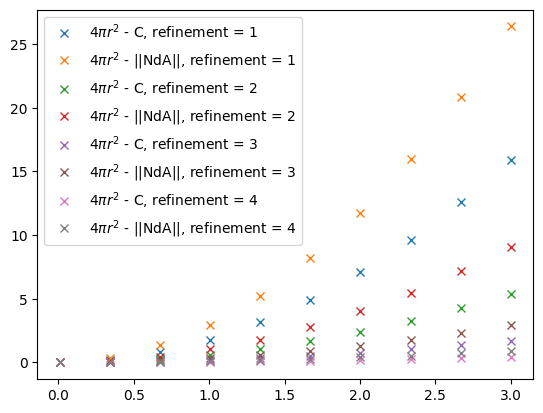

In [78]:
from matplotlib import pyplot as plt

refinement = 2
refinement_list = [1, 2, 3, 4]
#refinement_list = [2]
r_range = np.linspace(1e-2, 3, 10)
for refinement in refinement_list:
    C_list = []
    NdA_list = []
    for r in r_range:
        # Start main loop
        HC = sphere_from_cap(r, N=N, refinement=refinement)
        HNdA_ijk_l, C_ijk_l = [], []
        C = 0
        HNdA = np.zeros(3)
        for v in HC.V:
            n_i = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
            n_i = normalized(n_i)[0]  
            n_test = n_i + (np.random.rand(3) - 0.5)
            HNdA_i, C_i = hndA_i(v, n_i=n_test)
            C += C_i
            HNdA += HNdA_i
            #print(f"np.dot(n_i, HNdA_i)/C_i, n_i, HNdA_i = {np.dot(n_i, HNdA_i)/C_i}")
            #break

        # Compute the curvature
        HNdA_i = []  # total HNdA_i at vertex i
        A_ijk = []  # total HNdA_i for edge ij
        C_ij = []
        alpha_ij = []
        NdA_i = []
        for v in HC.V:
            #print(f'v.index = {v.index}')
            N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
            N_f0 = normalized(N_f0)[0]
            F, nn = vectorise_vnn(v)
            # Compute discrete curvatures
            c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
            # Append lists
            c_outd['HNdA_ij']
            HNdA_i.append(c_outd['HNdA_i'])
            C_ij.append(c_outd['C_ij'])
            alpha_ij.append(c_outd['alpha_ij'])
            A_ijk.append(c_outd['A_ijk'])
            #print(f'N_f0 dot = {N_f0}')
            np.dot(N_f0, c_outd['HNdA_i'])
            NdA_i.append(c_outd['NdA_i'])


        NdA_i = np.array(NdA_i)

        # 
        C_list.append(4*np.pi*r**2 - C)
        NdA_list.append(4*np.pi*r**2 - np.sum(np.linalg.norm(NdA_i, axis=1)))

    labstr = r'$4\pi r^2$ - C' + f', refinement = {refinement}'
    plt.plot(r_range, C_list, 'x', label=labstr)
    labstr = r'$4\pi r^2$ - ||NdA||' + f', refinement = {refinement}'
    plt.plot(r_range, NdA_list, 'x', label=labstr)
    plt.legend()

plt.show()

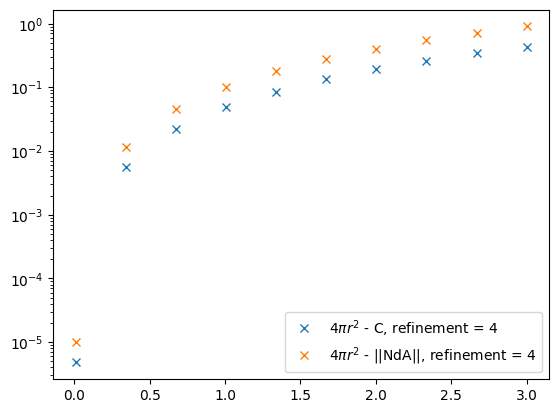

In [79]:
labstr = r'$4\pi r^2$ - C' + f', refinement = {refinement}'
plt.semilogy(r_range, C_list, 'x', label=labstr)
labstr = r'$4\pi r^2$ - ||NdA||' + f', refinement = {refinement}'
plt.semilogy(r_range, NdA_list, 'x', label=labstr)
plt.legend()